## Observations and Insights 

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
m_path = "data/Mouse_metadata.csv"
s_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(m_path)
study_results = pd.read_csv(s_path)

In [4]:
# Combine the data into a single dataset
m_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
m_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
len(m_data['Mouse ID'].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
m_doubles = m_data[m_data.duplicated(subset =['Mouse ID', 'Timepoint'], keep = 'first')]
m_doubles

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
m_clean = m_data.drop_duplicates(subset =['Mouse ID', 'Timepoint'], keep='first')
m_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(m_clean['Mouse ID'].unique())

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drugs1 = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

m_table = m_clean.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

m_avg = m_table['Tumor Volume (mm3)'].mean().unique()
m_med = m_table['Tumor Volume (mm3)'].median().unique()
m_var = m_table['Tumor Volume (mm3)'].var().unique()
m_std = m_table['Tumor Volume (mm3)'].std().unique()
m_sem = m_table['Tumor Volume (mm3)'].sem().unique()

# Assemble the resulting series into a single summary dataframe.

m_drug_reg = pd.DataFrame({"Drugs": drugs1,
                           "Mean": m_avg, 
                           "Median": m_med, 
                           "Variance": m_var,
                           "Standard Deviation": m_std, 
                           "SEM": m_sem})


m_drug_reg.set_index("Drugs", inplace=True)
m_drug_reg




,Mean,Median,Variance,Standard Deviation,SEM
Drugs,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

m_avg_sing = m_clean['Tumor Volume (mm3)'].mean()
m_med_sing = m_clean['Tumor Volume (mm3)'].median()
m_var_sing = m_clean['Tumor Volume (mm3)'].var()
m_std_sing = m_clean['Tumor Volume (mm3)'].std()
m_sem_sing = m_clean['Tumor Volume (mm3)'].sem()

# Using the aggregation method, produce the same summary statistics in a single line

m_sing = pd.DataFrame({"Mean": [m_avg_sing], "Median": [m_med_sing], "Variance": [m_var_sing],
                           "Standard Deviation": [m_std_sing], "SEM": [m_sem_sing]})



m_sing

,Mean,Median,Variance,Standard Deviation,SEM
0,50.449276,48.951421,79.291277,8.904565,0.204933


## Bar and Pie Charts

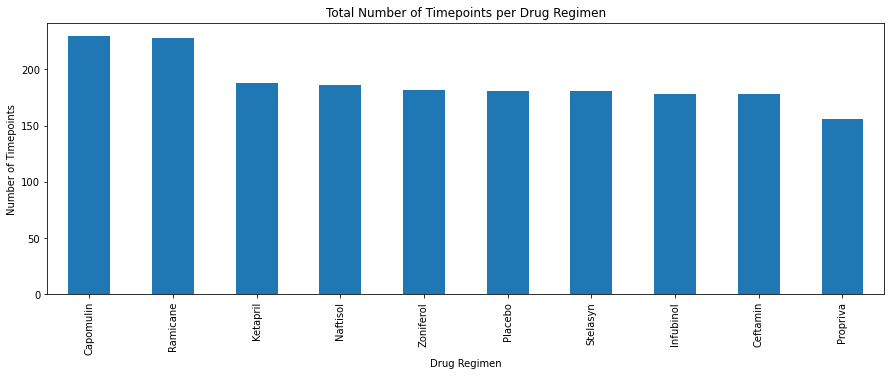

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_data = m_clean["Drug Regimen"].value_counts()

mp_clean = drug_data.plot(kind="bar", figsize=(15,5))

mp_clean


# Set a title for the chart
plt.title("Total Number of Timepoints per Drug Regimen")
mp_clean.set_xlabel("Drug Regimen")
mp_clean.set_ylabel("Number of Timepoints")

plt.show()
plt.tight_layout()  


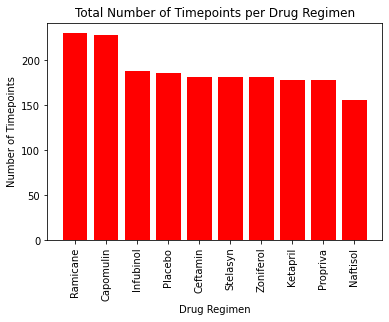

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
x_axis = np.arange(len(m_clean['Drug Regimen'].value_counts()))
drug_reg = m_clean['Drug Regimen'].value_counts()

plt.bar(x_axis, drug_reg, color = "r", align = "center")

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, drugs, rotation = "vertical") 
        
plt.title("Total Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")  

plt.show()
    

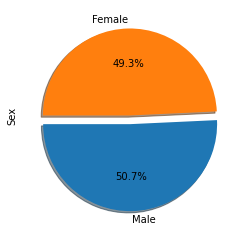

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = m_clean['Sex'].value_counts()

explode = (0.1,0)

ppie_data = gender_data.plot(kind = "pie", explode=explode, autopct="%1.1f%%", shadow=True,
                            startangle = 180)

([<matplotlib.patches.Wedge at 0x7fa2dc0f5610>,
 [Text(0.02795224913982119, -1.1996744023975945, 'Male'),
  Text(-0.025622792083347393, 1.099701537930112, 'Female')],
 [Text(0.016305478664895692, -0.6998100680652635, '50.7%'),
  Text(-0.013976068409098577, 0.5998372025073339, '49.3%')])

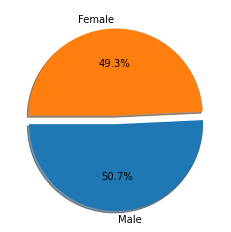

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']

plt.pie(gender_data, explode = explode, labels = labels, autopct="%1.1f%%", shadow = True,
        startangle=180)


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

m_pt = m_clean[(m_clean['Timepoint'] == 45)] 

m_dr = m_clean[(m_clean['Drug Regimen'] == "Capomulin") | (m_clean['Drug Regimen'] == "Infubinol") |
                   (m_clean['Drug Regimen'] == "Ramicane") | (m_clean['Drug Regimen'] == "Ceftamin")]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
m_tv = pd.merge(m_pt, m_dr, on = 'Tumor Volume (mm3)', how = "left")

m_tv.drop(columns=['Mouse ID_y', 'Drug Regimen_y', 'Sex_y', 'Age_months_y', 'Weight (g)_y', 'Timepoint_y', 'Metastatic Sites_y'])

m_tv


,Mouse ID_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3),Metastatic Sites_x,Mouse ID_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,k403,Ramicane,Male,21.0,16.0,45.0,1.0
1,s185,Capomulin,Female,3,17,45,23.343598,1,s185,Capomulin,Female,3.0,17.0,45.0,1.0
2,x401,Capomulin,Female,16,15,45,28.484033,0,x401,Capomulin,Female,16.0,15.0,45.0,0.0
3,m601,Capomulin,Male,22,17,45,28.430964,1,m601,Capomulin,Male,22.0,17.0,45.0,1.0
4,g791,Ramicane,Male,11,16,45,29.128472,1,g791,Ramicane,Male,11.0,16.0,45.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,y769,Ceftamin,Female,6,27,45,68.594745,4,y769,Ceftamin,Female,6.0,27.0,45.0,4.0
126,y865,Ceftamin,Male,23,26,45,64.729837,3,y865,Ceftamin,Male,23.0,26.0,45.0,3.0
127,z581,Infubinol,Female,24,25,45,62.754451,3,z581,Infubinol,Female,24.0,25.0,45.0,3.0
128,z795,Naftisol,Female,13,29,45,65.741070,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
[volume for volume in m_tv]

# Create empty list to fill with tumor vol data (for plotting)
t_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = m_tv['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for volume in m_tv:
    column1 = m_tv['Mouse ID_x'].unique()
    column2 = m_tv['Drug Regimen_x'].unique()
    column3 = m_tv['Tumor Volume (mm3)'].unique()
    print(column1, column2, column3)
        
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier = m_tv[(m_tv['Tumor Volume (mm3)'] < lower_bound) | (m_tv['Tumor Volume (mm3)'] > upper_bound)]

outlier

The lower quartile of occupancy is: 40.6583443125
The upper quartile of occupancy is: 68.8702959775
The interquartile range of occupancy is: 28.211951665000008
The the median of occupancy is: 63.53754596 
['k403' 's185' 'x401' 'm601' 'g791' 's508' 'm546' 'z578' 'j913' 'u364'
 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989' 'i738'
 'a520' 'w914' 'r811' 'g288' 'i334' 'd251' 'l897' 'b742' 'b128' 'a411'
 'j119' 'v923' 'g316' 's710' 'l509' 'r944' 'e662' 'u196' 'q597' 'a444'
 'i557' 'a203' 'a251' 'a262' 'a275' 'a401' 'a492' 'a685' 'a699' 'a818'
 'a897' 'a963' 'b559' 'b879' 'c139' 'c264' 'c282' 'c302' 'c402' 'c559'
 'c757' 'c766' 'c832' 'e213' 'e227' 'e476' 'e584' 'f345' 'f545' 'g296'
 'g497' 'g570' 'h246' 'i635' 'i901' 'j296' 'j365' 'j755' 'j984' 'k210'
 'k382' 'k483' 'k862' 'k894' 'l471' 'l661' 'l700' 'l725' 'l733' 'm269'
 'm550' 'm650' 'n304' 'o287' 'o331' 'o562' 'o795' 'o926' 'p136' 'p189'
 'p438' 'q511' 'q633' 'q787' 'r604' 'r701' 's337' 's565' 't198' 't451'
 't718' 't724'

,Mouse ID_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3),Metastatic Sites_x,Mouse ID_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Metastatic Sites_y


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()

## Line and Scatter Plots

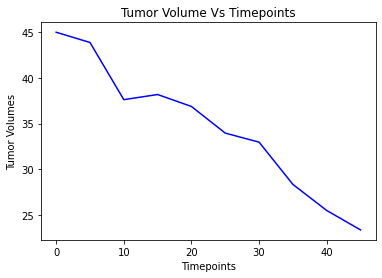

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

m_cap = m_clean.loc[m_clean["Drug Regimen"] == "Capomulin"]

s185 = [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671,
        28.328531, 25.472143, 23.343598]
    
tumor_vol = m_cap['Tumor Volume (mm3)']

m_tp = m_cap['Timepoint'].unique()

m_vs = plt.plot(m_tp, s185, color="blue")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volumes")
plt.title("Tumor Volume Vs Timepoints")

plt.show()

Text(0, 0.5, 'Average Tumor Volume')

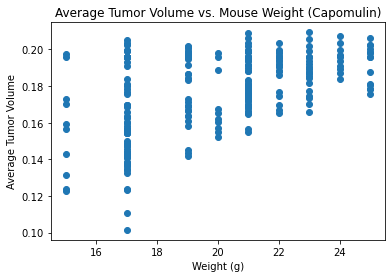

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

m_cap = m_clean.loc[m_clean["Drug Regimen"] == "Capomulin"]

m_lb = m_cap['Weight (g)']

avg_tumor_vol = (m_cap['Tumor Volume (mm3)']) / len(m_lb)

plt.scatter(m_lb, avg_tumor_vol, marker = "o")

plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.53


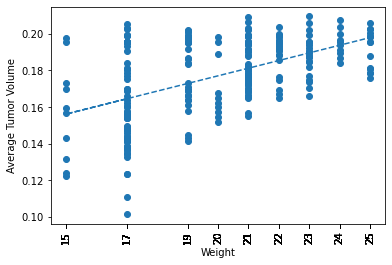

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(m_lb, avg_tumor_vol)[0],2)}")

m_slope, m_int, m_r, m_p, m_std_err = st.linregress(m_lb, avg_tumor_vol)

m_fit = m_slope * m_lb + m_int

plt.scatter(m_lb, avg_tumor_vol)
plt.plot(m_lb,m_fit,"--")
plt.xticks(m_lb, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()
